In [1]:
# Importing course packages; you can add more too!
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Importing course datasets as DataFrames
climate_change = pd.read_csv('datasets/climate_change.csv', parse_dates=["date"], index_col="date")
medals = pd.read_csv('datasets/medals_by_country_2016.csv', index_col=0)
summer_2016 = pd.read_csv('datasets/summer2016.csv')
austin_weather = pd.read_csv("datasets/austin_weather.csv", index_col="DATE")
weather = pd.read_csv("datasets/seattle_weather.csv", index_col="DATE")

# Some pre-processing on the weather datasets, including adding a month column
seattle_weather = weather[weather["STATION"] == "USW00094290"] 
month = ["Jan", "Feb", "Mar", "Apr", "May", "Jun", "Jul", "Aug", "Sep", "Oct", "Nov", "Dec"] 
seattle_weather["MONTH"] = month 
austin_weather["MONTH"] = month

climate_change.head() # Display the first five rows of this DataFrame

,co2,relative_temp
date,,
1958-03-06,315.71,0.10
1958-04-06,317.45,0.01
1958-05-06,317.50,0.08
1958-06-06,NaN,-0.05
1958-07-06,315.86,0.06


- measurement taken from **6th** of `1958 to 2016`.
- co2 is **presence of carbon dioxide** in air at day of measurement. its unit is **parts/million**.
- column `relative _temp` is the relative remperature during measuremnet.

- we have to let the pandas knows it is `time series` data. we will use `index_col` to make date a `index`.
- It have **706** enteries. 

In [3]:
climate_change.index

DatetimeIndex(['1958-03-06', '1958-04-06', '1958-05-06', '1958-06-06',
               '1958-07-06', '1958-08-06', '1958-09-06', '1958-10-06',
               '1958-11-06', '1958-12-06',
               ...
               '2016-03-06', '2016-04-06', '2016-05-06', '2016-06-06',
               '2016-07-06', '2016-08-06', '2016-09-06', '2016-10-06',
               '2016-11-06', '2016-12-06'],
              dtype='datetime64[ns]', name='date', length=706, freq=None)

In [4]:
climate_change.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 706 entries, 1958-03-06 to 2016-12-06
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   co2            699 non-null    float64
 1   relative_temp  706 non-null    float64
dtypes: float64(2)
memory usage: 16.5 KB


## Plotting  time-series data
- Previous chapter is relative simple example of time-series data.
- plot preceptation/ temperature on time vairable, the month of the year.
- In this notebook we'll focus on times-eries visulaization using matplotlib.
- matplotlib automaitically choose the `x_ticks` as difference of `10 year`

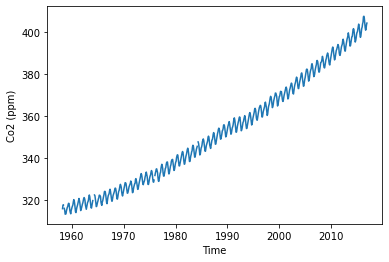

In [5]:
import matplotlib.pyplot as plt
fig , ax = plt.subplots()
ax.plot(climate_change.index, climate_change['co2'])
ax.set_xlabel('Time')
ax.set_ylabel('Co2 (ppm)')
plt.show()

### Zooming into a decade

In [6]:
sixties = climate_change['1960-01-01':'1969-12-31']
sixties.head()

,co2,relative_temp
date,,
1960-01-06,316.43,-0.01
1960-02-06,316.97,0.14
1960-03-06,317.58,-0.36
1960-04-06,319.02,-0.16
1960-05-06,320.03,-0.08


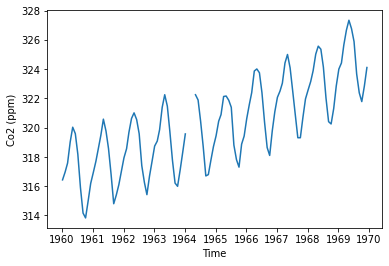

In [7]:
fig , ax = plt.subplots()
ax.plot(sixties.index, sixties['co2'])
ax.set_xlabel('Time')
ax.set_ylabel('Co2 (ppm)')
plt.show()

### Zooming in on one year

In [8]:
sixty_nine = climate_change['1969-01-01':'1969-12-31']
sixty_nine.head()

,co2,relative_temp
date,,
1969-01-06,324.00,-0.11
1969-02-06,324.42,-0.14
1969-03-06,325.64,0.00
1969-04-06,326.66,0.19
1969-05-06,327.34,0.20


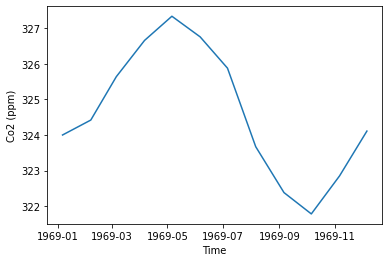

In [9]:
fig , ax = plt.subplots()
ax.plot(sixty_nine.index, sixty_nine['co2'])
ax.set_xlabel('Time')
ax.set_ylabel('Co2 (ppm)')
plt.show()

## Plotting time-series with different variables

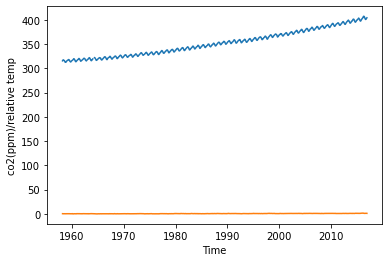

In [10]:
fig, ax = plt.subplots()
ax.plot(climate_change.index, climate_change['co2'])
ax.plot(climate_change.index, climate_change['relative_temp'])
ax.set_xlabel('Time')
ax.set_ylabel('co2(ppm)/relative temp')
plt.show()

- The above is shown like this becuase both column have `different scale to plot` so, now we'll do 

### Using twin axes

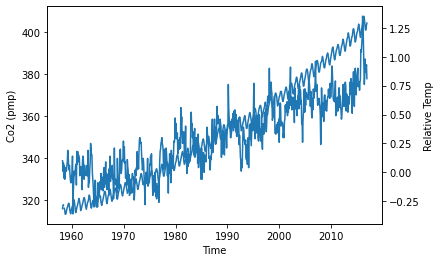

In [11]:
fig, ax = plt.subplots()
ax.plot(climate_change.index, climate_change['co2'])
ax.set_xlabel('Time')
ax.set_ylabel('Co2 (pmp)')
ax2 = ax.twinx()
ax2.plot(climate_change.index, climate_change['relative_temp'])
ax2.set_ylabel('Relative Temp')
plt.show()

### Separating variables by color

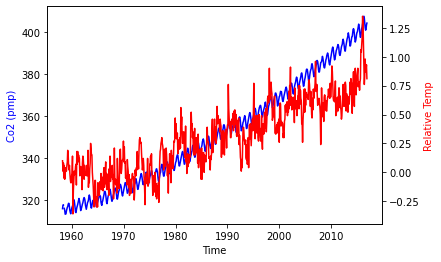

In [12]:
fig, ax = plt.subplots()
ax.plot(climate_change.index, climate_change['co2'], color='b')
ax.set_xlabel('Time')
ax.set_ylabel('Co2 (pmp)', color='b')
ax2 = ax.twinx()
ax2.plot(climate_change.index, climate_change['relative_temp'], color='r')
ax2.set_ylabel('Relative Temp', color='r')
plt.show()

### Coloring the ticks

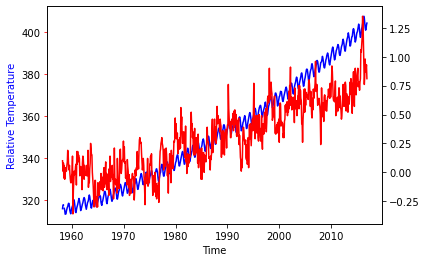

In [13]:
fig, ax = plt.subplots()
ax.plot(climate_change.index, climate_change['co2'], color='b')
ax.set_xlabel('Time')
ax.set_ylabel('Co2(pmp)', color='b')
ax.tick_params('y', color='b')

ax2 = ax.twinx()
ax2.plot(climate_change.index, climate_change['relative_temp'], color='r')
ax.set_ylabel('Relative Temperature')
ax.tick_params('y', color='r')

plt.show()

### Function that plots time-series

In [14]:
def plotting_timeseries(axes, x, y, color , xlabel, ylabel):
    axes.plot(x, y, color=color)
    axes.set_xlabel(xlabel)
    axes.set_ylabel(ylabel, color = color)
    axes.tick_params('y', colors=color)

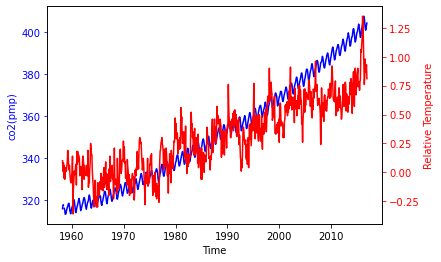

In [15]:
fig, ax = plt.subplots()

plotting_timeseries(ax, climate_change.index,
                    climate_change['co2'], 
                    'blue', 'Time', 'co2(pmp)')
ax2 = ax.twinx()

plotting_timeseries(ax2, climate_change.index,
                    climate_change['relative_temp'],
                    'red', 'Time', 'Relative Temperature')

plt.show()

## Annotating time-series data

### using `.annotate()` command
- annotation are usually ***small piece of text that refers to particular part** of visualization.
- Focus of attention on some feature that data & explaining that feature

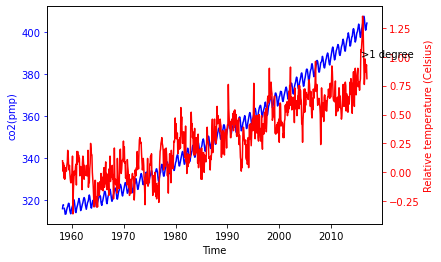

In [16]:
fig, ax = plt.subplots()

plotting_timeseries(ax, climate_change.index, 
                    climate_change['co2'], 'blue', 'Time', 'co2(pmp)')
ax2 = ax.twinx()

plotting_timeseries(ax2, climate_change.index, 
                    climate_change['relative_temp'], 'red', 'Time', 'Relative temperature (Celsius)')

ax2.annotate('>1 degree', xy= [pd.Timestamp("2015-10-06"), 1]) #xy is used to locate the point of annotation

plt.show()

### Positioning the text

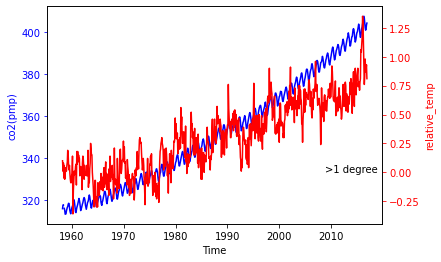

In [17]:
fig, ax = plt.subplots()

plotting_timeseries(ax, climate_change.index,
                    climate_change['co2'], 'blue', 'Time', 'co2(pmp)')
ax2 = ax.twinx()
plotting_timeseries(ax2, climate_change.index, 
                    climate_change['relative_temp'], 'red', 'Time', 'relative_temp')

ax2.annotate('>1 degree',
             xy= [pd.Timestamp("2015-10-06"), 1],
             xytext = [pd.Timestamp('2008-10-06'), 0.00]) #xytext is used to positioning the text

plt.show()

### Adding arrows to annotation

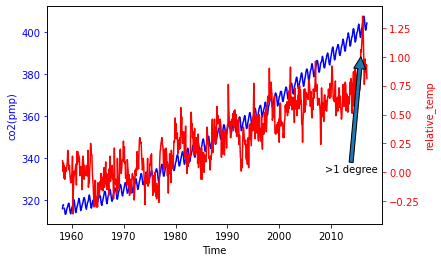

In [18]:
fig, ax = plt.subplots()

plotting_timeseries(ax, climate_change.index,
                    climate_change['co2'], 'blue', 'Time', 'co2(pmp)')
ax2 = ax.twinx()
plotting_timeseries(ax2, climate_change.index,
                    climate_change['relative_temp'], 'red', 'Time', 'relative_temp')

ax2.annotate('>1 degree',
             xy= [pd.Timestamp('2015-10-06'), 1],
             xytext = [pd.Timestamp('2008-10-06'), 0.00],
             arrowprops={}) #arrowprops is used to incdicate the text for specific point

plt.show()

### Customizing arrow properties

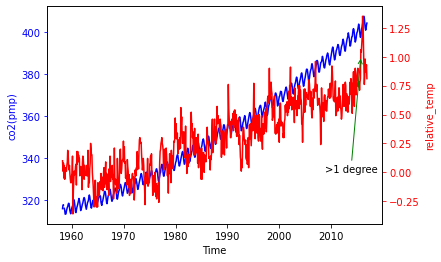

In [19]:
fig, ax = plt.subplots()

plotting_timeseries(ax, climate_change.index,
                    climate_change['co2'], 'blue', 'Time', 'co2(pmp)')
ax2 = ax.twinx()

plotting_timeseries(ax2, climate_change.index,
                    climate_change['relative_temp'], 'red', 'Time', 'relative_temp')
ax2.annotate('>1 degree',
             xy= [pd.Timestamp('2015-10-06'), 1],
             xytext = [pd.Timestamp('2008-10-06'), 0.00],
             arrowprops={'arrowstyle': '->', 'color' : 'green'}) #customizing the arrowprops

plt.show()

# Practise

### Read data with a time index

In [20]:
# Import pandas as pd
import pandas as pd

# Read the data from file using read_csv
climate_change = pd.read_csv('./datasets/climate_change.csv', index_col=0, parse_dates= True)

In [21]:
climate_change.index

DatetimeIndex(['1958-03-06', '1958-04-06', '1958-05-06', '1958-06-06',
               '1958-07-06', '1958-08-06', '1958-09-06', '1958-10-06',
               '1958-11-06', '1958-12-06',
               ...
               '2016-03-06', '2016-04-06', '2016-05-06', '2016-06-06',
               '2016-07-06', '2016-08-06', '2016-09-06', '2016-10-06',
               '2016-11-06', '2016-12-06'],
              dtype='datetime64[ns]', name='date', length=706, freq=None)

In [22]:
climate_change.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 706 entries, 1958-03-06 to 2016-12-06
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   co2            699 non-null    float64
 1   relative_temp  706 non-null    float64
dtypes: float64(2)
memory usage: 16.5 KB


### Plot time-series data

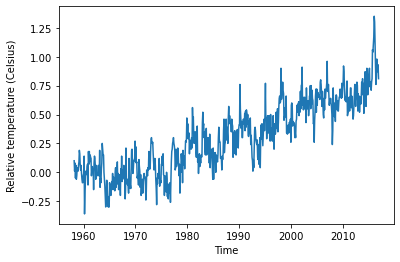

In [23]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots()

# Add the time-series for "relative_temp" to the plot
ax.plot(climate_change.index, climate_change['relative_temp'])

# Set the x-axis label
ax.set_xlabel('Time')

# Set the y-axis label
ax.set_ylabel('Relative temperature (Celsius)')

# Show the figure
plt.show()

### Using a time index to zoom in

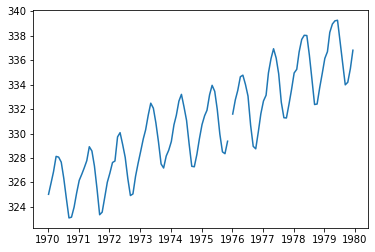

In [24]:
import matplotlib.pyplot as plt

# Use plt.subplots to create fig and ax
fig, ax = plt.subplots()

# Create variable seventies with data from "1970-01-01" to "1979-12-31"
seventies = climate_change['1970-01-01':'1979-12-31']

# Add the time-series for "co2" data from seventies to the plot
ax.plot(seventies.index, seventies["co2"])

# Show the figure
plt.show()

### Plotting two variables

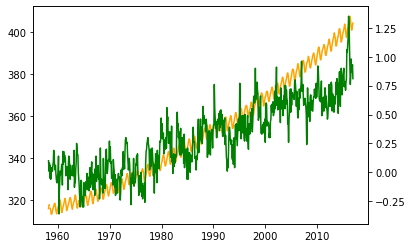

In [25]:
import matplotlib.pyplot as plt

# Initalize a Figure and Axes
fig, ax = plt.subplots()

# Plot the CO2 variable in blue
ax.plot(climate_change.index, climate_change['co2'], color='orange')

# Create a twin Axes that shares the x-axis
ax2 = ax.twinx()

# Plot the relative temperature in red
ax2.plot(climate_change.index, climate_change['relative_temp'], color='green')

plt.show()

### Defining a function that plots time-series data

In [26]:
# Define a function called plot_timeseries
def plot_timeseries(axes, x, y, color, xlabel, ylabel):

  # Plot the inputs x,y in the provided color
  axes.plot(x, y, color=color)

  # Set the x-axis label
  axes.set_xlabel(xlabel)

  # Set the y-axis label
  axes.set_ylabel(ylabel, color=color)

  # Set the colors tick params for y-axis
  axes.tick_params('y', colors=color)

### calling the function

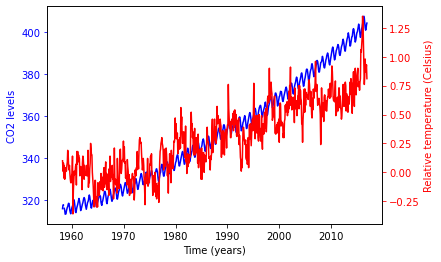

In [27]:
fig, ax = plt.subplots()

# Plot the CO2 levels time-series in blue
plot_timeseries(ax,
                climate_change.index,
                climate_change['co2'],
                "blue", 'Time (years)', "CO2 levels")

# Create a twin Axes object that shares the x-axis
ax2 = ax.twinx()

# Plot the relative temperature data in red
plot_timeseries(ax2,
                climate_change.index,
                climate_change['relative_temp'], 
                "red", 'Time (years)', "Relative temperature (Celsius)")

plt.show()

### Annotating a plot of time-series data

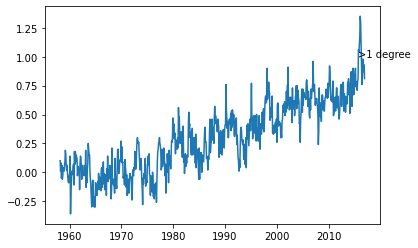

In [28]:
fig, ax = plt.subplots()

# Plot the relative temperature data
ax.plot(climate_change.index, climate_change['relative_temp'])

# Annotate the date at which temperatures exceeded 1 degree
ax.annotate(">1 degree", xy=[pd.Timestamp('2015-10-06'), 1])

plt.show()

### Plotting time-series: putting it all together

- Use the plot_timeseries function to plot CO2 levels against time. Set xlabel to "Time (years)" ylabel to "CO2 levels" and color to 'blue'.
- Create ax2, as a twin of the first Axes.
- In ax2, plot temperature against time, setting the color ylabel to "Relative temp (Celsius)" and color to 'red'.
- Annotate the data using the ax2.annotate method. Place the text ">1 degree" in x=pd.Timestamp('2008-10-06'), y=-0.2 pointing with a gray thin arrow to x=pd.Timestamp('2015-10-06'), y = 1.

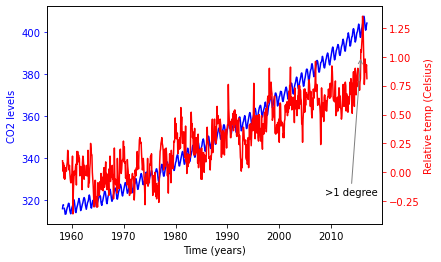

In [29]:
fig, ax = plt.subplots()

# Plot the CO2 levels time-series in blue
plot_timeseries(ax,
                climate_change.index,
                climate_change['co2'],
                'blue', "Time (years)", "CO2 levels")

# Create an Axes object that shares the x-axis
ax2 = ax.twinx()

# Plot the relative temperature data in red
plot_timeseries(ax2,
                climate_change.index,
                climate_change['relative_temp'],
                'red', "Time (years)", "Relative temp (Celsius)")

# Annotate point with relative temperature >1 degree
ax2.annotate(">1 degree",
            xy =[pd.Timestamp("2015-10-06"), 1],
            xytext=[pd.Timestamp('2008-10-06'), -0.2],
            arrowprops={ 'arrowstyle': '->',
                         'color':'gray'})

plt.show()